In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# creating data X and keeping random seed 42 
random.seed(42)
X = random.sample(range(-500, 500), 200)
print(X)

# creating value of y using X
y=[]
for i in X:
    y.append(5*i+3) 
print(y)

[154, -386, -475, 259, -219, -250, -272, -358, 254, -396, 192, 258, 413, 58, -411, 104, -68, -468, -470, -405, -277, -262, 17, 116, -473, 74, -297, 233, 165, 218, 486, -71, -275, -41, 103, -216, 328, 390, -494, 277, 325, -337, 214, 483, -152, 464, -341, -280, 281, -156, 490, -406, -111, -401, -133, 367, -148, 118, -230, 326, -456, 247, -30, 49, -373, -113, -420, 65, -200, 349, 143, 133, 406, 382, -130, 91, -304, 221, -429, -454, 177, -267, 291, -204, -419, 375, 478, 387, -397, 447, 454, -36, 150, 354, -127, -334, -121, -137, -286, 186, -227, 470, 199, 163, -427, 123, 407, -325, 46, 246, 494, -333, -27, -112, -224, 155, 204, 70, -276, 201, -168, 363, 286, 294, -443, -266, 341, 482, 324, -177, -90, -226, -433, -284, 80, 235, -178, -283, 171, 11, -95, 158, -31, -354, -229, 492, -248, 262, 474, 51, -231, 264, 98, -62, 97, -92, 425, 381, -359, 21, 5, -407, 273, -452, -388, -344, 142, 458, 311, 196, 456, 110, -435, -106, -110, 463, -21, 41, -243, 66, -489, 330, 238, -383, 198, 436, 268, 399,

In [3]:
# creating dataframe using X and y values
df = pd.DataFrame(list(zip(X, y)),columns =['X', 'y'])
df

X     y
0    154   773
1   -386 -1927
2   -475 -2372
3    259  1298
4   -219 -1092
..   ...   ...
195  408  2043
196 -497 -2482
197  239  1198
198  236  1183
199  430  2153

[200 rows x 2 columns]

### Linear regression

In [4]:
# seprating x and y from data frame for input and output feature
X_data = df.drop('y',axis=1)
y_data = df['y']
print(X_data.shape,y_data.shape)

# train test split with 30 % test size
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.30, random_state=42)


(200, 1) (200,)


In [5]:
# model initialization and fitting of data
reg = LinearRegression().fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on trainin data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
linear_reg_score = reg.score(X_test,y_test)
print('Test Score',linear_reg_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [5.]
Intercept 3.0000000000000284
Train Score 1.0
Test Score 1.0
Mean error 9.607358156214853e-26


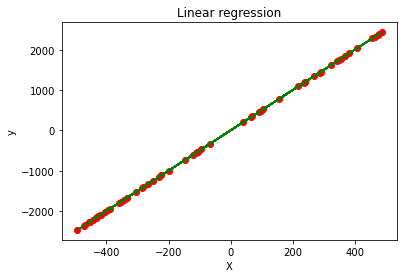

In [6]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Linear regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Decision Tree Regressor 

In [7]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
score = regressor.score(X_train,y_train)
print('train score',score)

decision_tree_score = regressor.score(X_test,y_test)
print('test score',decision_tree_score)

# predicting values from X_test
pred_y = regressor.predict(X_test)

# error
decision_mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',decision_mean_error)

train score 1.0
test score 0.9996368501819645
Mean error 955.4166666666666


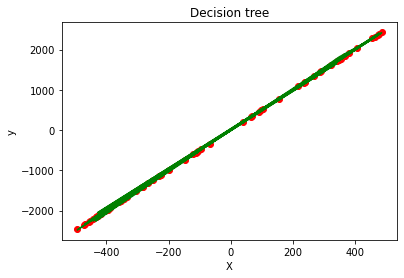

In [8]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regressor.predict(X_test), color = "green")
plt.title("Decision tree")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Ridge Regression 

In [9]:
# model initialization and fitting of data
reg = Ridge().fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on trainin data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
ridge_reg_score = reg.score(X_test,y_test)
print('Test Score',ridge_reg_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [4.99999955]
Intercept 3.000021118519129
Train Score 0.9999999999999921
Test Score 0.9999999999999912
Mean error 2.3045200918500068e-08


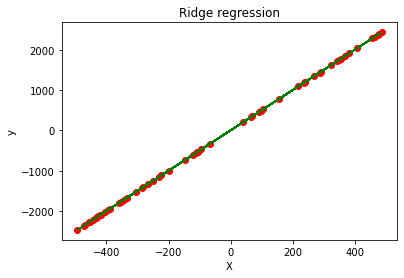

In [10]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Ridge regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### SVR 

In [11]:
# model initialization and fitting of data
reg = SVR(C=1.0, epsilon=0.2, kernel='linear').fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on training data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
SVR_score = reg.score(X_test,y_test)
print('Test Score',SVR_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [[4.99959799]]
Intercept [3.00020101]
Train Score 0.999999993357993
Test Score 0.9999999933281596
Mean error 0.017553051690554513


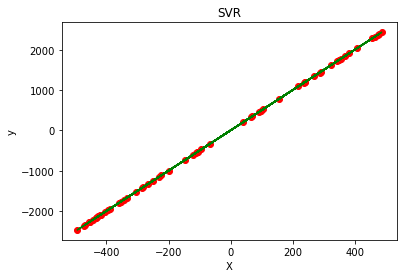

In [12]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("SVR")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Knn 

In [13]:
# parameter for KNN
params = {'n_neighbors': [3, 5, 7, 9, 11,15,20,30,50],'weights':['uniform', 'distance']}
# model initialization and fitting of data
knn = KNeighborsRegressor()
cv = GridSearchCV(knn, params, cv=5).fit(X_train, y_train)

print(cv.best_params_)

# score obatined by model on trainin data
print('Train Score',cv.score(X_train,y_train))

# score obatined by model on test data
knn_reg_score = cv.score(X_test,y_test)
print('Test Score',knn_reg_score)

# predicting values from X_test
pred_y = cv.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

{'n_neighbors': 3, 'weights': 'distance'}
Train Score 1.0
Test Score 0.9997580198416175
Mean error 636.6294703710337


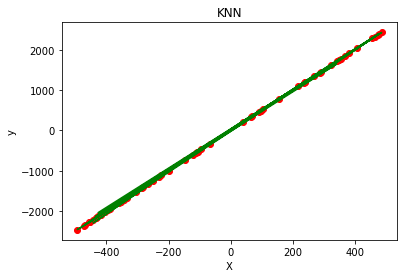

In [14]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, cv.predict(X_test), color = "green")
plt.title("KNN")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

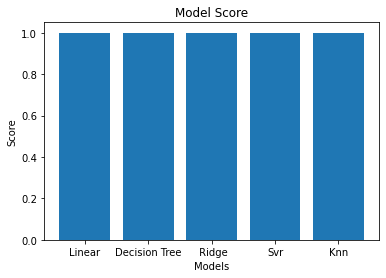

In [15]:
data = [linear_reg_score,decision_tree_score,ridge_reg_score,SVR_score,knn_reg_score]
labels = ['Linear', 'Decision Tree', ' Ridge', 'Svr','Knn']
plt.xticks(range(len(data)), labels)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Score')
plt.bar(range(len(data)), data) 
plt.show()

In [16]:
df.head()

X     y
0  154   773
1 -386 -1927
2 -475 -2372
3  259  1298
4 -219 -1092

## Adding noise to data

In [17]:
# creating individual dataframe copy
new_df = df.copy()
# selecting random 10 values from 10 frame to add noise to
dfupdate=new_df.sample(100)

# adding 10 to randomly 10 seleted values 
dfupdate.y +=random.randint(-100, 100)

# updating the dataframe
new_df.update(dfupdate)
update_list = dfupdate.index.tolist()
new_df.head()

X       y
0  154.0   801.0
1 -386.0 -1927.0
2 -475.0 -2372.0
3  259.0  1326.0
4 -219.0 -1064.0

In [18]:
# seprating x and y from data frame for input and output feature
X_data = new_df.drop('y',axis=1)
y_data = new_df['y']
print(X_data.shape,y_data.shape)

# train test split with 30 % test size
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.30, random_state=42)


(200, 1) (200,)


### Linear regression

In [19]:
# model initialization and fitting of data
reg = LinearRegression().fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on trainin data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
linear_reg_score = reg.score(X_test,y_test)
print('Test Score',linear_reg_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [5.00506352]
Intercept 15.159808077933235
Train Score 0.9999047731588476
Test Score 0.9999129307798397
Mean error 228.30174644343003


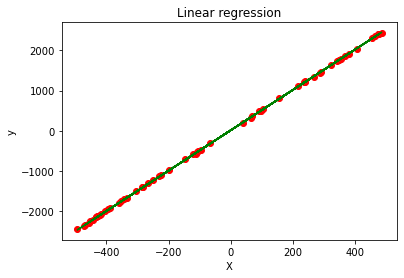

In [20]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Linear regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Decision tree 

In [21]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
score = regressor.score(X_train,y_train)
print('train score',score)

decision_tree_score = regressor.score(X_test,y_test)
print('test score',decision_tree_score)

# predicting values from X_test
pred_y = regressor.predict(X_test)

# error
decision_mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',decision_mean_error)

train score 1.0
test score 0.9994775823190698
Mean error 1369.8166666666666


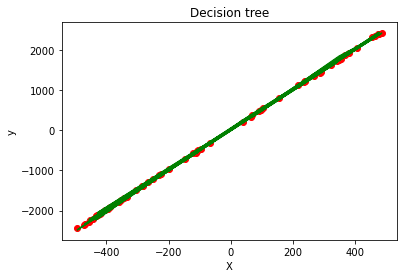

In [22]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regressor.predict(X_test), color = "green")
plt.title("Decision tree")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Ridge Regression

In [23]:
# model initialization and fitting of data
reg = Ridge().fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on trainin data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
ridge_reg_score = reg.score(X_test,y_test)
print('Test Score',ridge_reg_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [5.00506308]
Intercept 15.159829217839103
Train Score 0.9999047731588397
Test Score 0.9999129314772035
Mean error 228.2999179054882


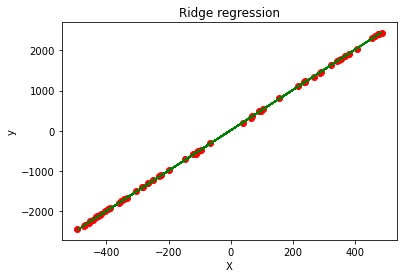

In [24]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Ridge regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### SVR

In [25]:
# model initialization and fitting of data
reg = SVR(C=1.0, epsilon=0.2, kernel='linear').fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on training data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
SVR_score = reg.score(X_test,y_test)
print('Test Score',SVR_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [[5.]]
Intercept [3.2]
Train Score 0.999829691209167
Test Score 0.9998133231893841
Mean error 489.48000000023995


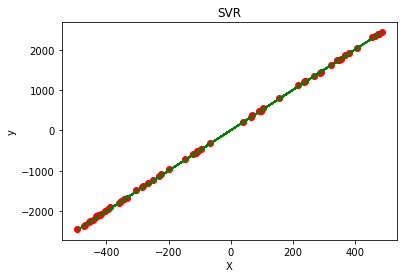

In [26]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("SVR")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Knn

In [27]:
# parameter for KNN
params = {'n_neighbors': [3, 5, 7, 9, 11,15,20,30,50],'weights':['uniform', 'distance']}
# model initialization and fitting of data
knn = KNeighborsRegressor()
cv = GridSearchCV(knn, params, cv=5).fit(X_train, y_train)

print(cv.best_params_)

# score obatined by model on trainin data
print('Train Score',cv.score(X_train,y_train))

# score obatined by model on test data
knn_reg_score = cv.score(X_test,y_test)
print('Test Score',knn_reg_score)

# predicting values from X_test
pred_y = cv.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

{'n_neighbors': 3, 'weights': 'distance'}
Train Score 1.0
Test Score 0.9996939182847312
Mean error 802.5682327415634


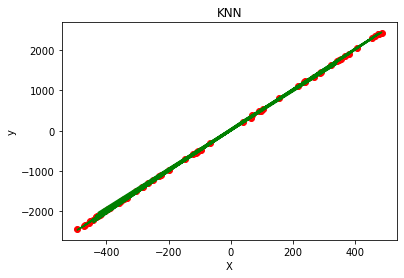

In [28]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, cv.predict(X_test), color = "green")
plt.title("KNN")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

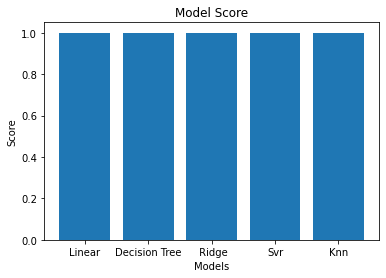

In [29]:
data = [linear_reg_score,decision_tree_score,ridge_reg_score,SVR_score,knn_reg_score]
labels = ['Linear', 'Decision Tree', ' Ridge', 'Svr','Knn']
plt.xticks(range(len(data)), labels)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Score')
plt.bar(range(len(data)), data) 
plt.show()

### On adding outlier 

In [30]:
# creating individual dataframe copy
new_df_outlier = df.copy()
# selecting random 10 values from 10 frame to add noise to
dfupdate=new_df_outlier.sample(50)

# adding 10 to randomly 10 seleted values 
dfupdate.y +=random.randint(1000, 1500)

# updating the dataframe
new_df_outlier.update(dfupdate)
update_list = dfupdate.index.tolist()
new_df_outlier.head()

X       y
0  154.0   773.0
1 -386.0 -1927.0
2 -475.0 -2372.0
3  259.0  1298.0
4 -219.0 -1092.0

In [31]:
# seprating x and y from data frame for input and output feature
X_data = new_df_outlier.drop('y',axis=1)
y_data = new_df_outlier['y']
print(X_data.shape,y_data.shape)

# train test split with 30 % test size
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.30, random_state=42)


(200, 1) (200,)


### Linear Regression

In [32]:
# model initialization and fitting of data
reg = LinearRegression().fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on trainin data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
linear_reg_score = reg.score(X_test,y_test)
print('Test Score',linear_reg_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [4.92947612]
Intercept 343.9167791053809
Train Score 0.8459896498999478
Test Score 0.8793261673878134
Mean error 381125.72089068906


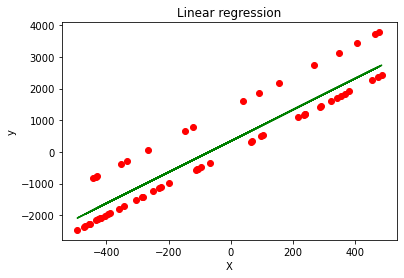

In [33]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Linear regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Decision tree 

In [34]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
score = regressor.score(X_train,y_train)
print('train score',score)

decision_tree_score = regressor.score(X_test,y_test)
print('test score',decision_tree_score)

# predicting values from X_test
pred_y = regressor.predict(X_test)

# error
decision_mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',decision_mean_error)

train score 1.0
test score 0.743994516974182
Mean error 808545.4166666666


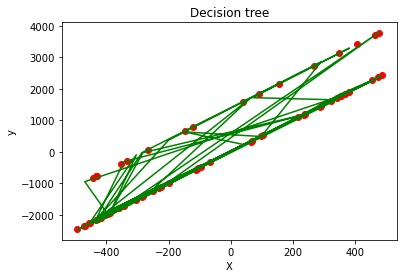

In [35]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regressor.predict(X_test), color = "green")
plt.title("Decision tree")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Ridge Regression

In [36]:
# model initialization and fitting of data
reg = Ridge().fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on trainin data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
ridge_reg_score = reg.score(X_test,y_test)
print('Test Score',ridge_reg_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [4.92947568]
Intercept 343.91679992602803
Train Score 0.8459896498999412
Test Score 0.8793261619177974
Mean error 381125.738166711


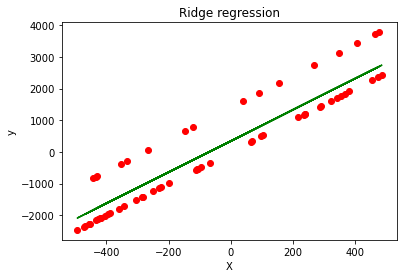

In [37]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Ridge regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### SVR

In [38]:
# model initialization and fitting of data
reg = SVR(C=1.0, epsilon=0.2, kernel='linear').fit(X_train, y_train)

# coefficent of model
print('Coefficecnt',reg.coef_)

# intercept of model
print('Intercept',reg.intercept_)

# score obatined by model on training data
print('Train Score',reg.score(X_train,y_train))

# score obatined by model on test data
SVR_score = reg.score(X_test,y_test)
print('Test Score',SVR_score)

# predicting values from X_test
pred_y = reg.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

Coefficecnt [[5.]]
Intercept [3.2]
Train Score 0.7964199915841881
Test Score 0.8369134224122713
Mean error 515078.4400001012


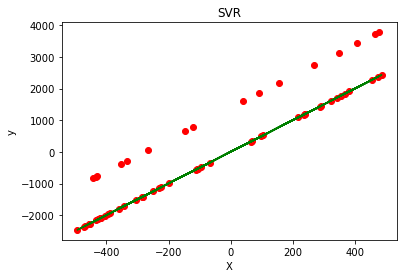

In [39]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("SVR")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Knn

In [43]:
# parameter for KNN
params = {'n_neighbors': [3, 5, 7, 9, 11,15,20,30,50],'weights':['uniform', 'distance']}
# model initialization and fitting of data
knn = KNeighborsRegressor()
cv = GridSearchCV(knn, params, cv=5).fit(X_train, y_train)

print(cv.best_params_)

# score obatined by model on trainin data
print('Train Score',cv.score(X_train,y_train))

# score obatined by model on test data
knn_reg_score = cv.score(X_test,y_test)
print('Test Score',knn_reg_score)

# predicting values from X_test
pred_y = cv.predict(X_test)

# error
mean_error = mean_squared_error(y_test, pred_y)

print('Mean error',mean_error)

{'n_neighbors': 50, 'weights': 'distance'}
Train Score 1.0
Test Score 0.8594941381448602
Mean error 443761.4744615298


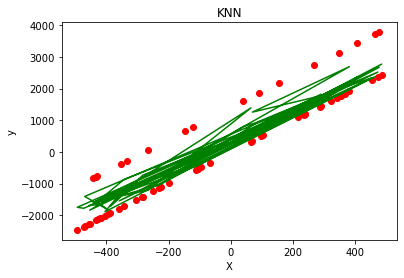

In [44]:
knn = KNeighborsRegressor(n_neighbors = 50,weights = 'distance')
knn.fit(X_train,y_train)

plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, knn.predict(X_test), color = "green")
plt.title("KNN")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

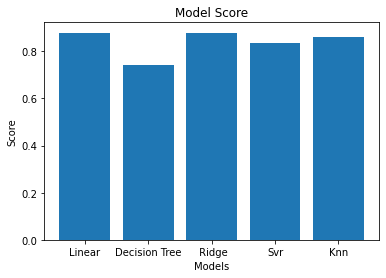

In [42]:
data = [linear_reg_score,decision_tree_score,ridge_reg_score,SVR_score,knn_reg_score]
labels = ['Linear', 'Decision Tree', ' Ridge', 'Svr','Knn']
plt.xticks(range(len(data)), labels)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Score')
plt.bar(range(len(data)), data) 
plt.show()

## Note for noisy data

#### For Linear regression, We can say that noise dint affect much, But our coefficent and intercept changed.

#### For Decision tree, we can say that noisy data dint affect the model performance.

#### Ridge regression works well for corelation of data in large dataset, Casue we have lesser features it works same like linear regression. So it gives same result like Linear Regression

#### Knn is sensetive to noisy data.

#### SVR has no effect of noisy data

### Note for Outlier data

#### Linear regression can not deal with outlier hence the score changed drasticaly on adding outlier


#### For decission tree, We can say that outlier affected it, With a test score of 75%

#### Ridge regression works well for corelation of data in large dataset, Casue we have lesser features it works same like linear regression, Outlier

#### Outlier affect

#### SVR has no effect of outlier data